<a href="https://colab.research.google.com/github/sryaco/aitools/blob/notebooks/matchphoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Provides the top 5 most similar images to one  selected image, based on pattern similarity
#Load the Drive helper and mount
from google.colab import drive#
# This will prompt for authorization.
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [ ]:
#set up paths
folder_path ="/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos"
#input_file = folder_path + "/dalle023landscapeimage.jpg"
#put file to matched in different folder so doesn't try to match itself
input_file = "/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/dalle2024sepiagardens.jpg"

In [ ]:
#bring in libraries
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.utils import load_img
from keras.utils import img_to_array

from scipy.spatial import distance
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# load libraries for loading/processing the images
# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
from glob import glob
from random import randint
import pandas as pd
import pickle


In [ ]:
# load model
model = VGG16(weights='imagenet', include_top=False)
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [ ]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features


In [ ]:
# Main routine - takes a while, as it needs to chew thru and pre-process all of the tif images in the selected folder
# Path to the reference image and the images to compare
reference_image_path = input_file
images_directory = folder_path

# Extract features from the reference image
reference_image_features = extract_features(reference_image_path, model)

# Loop over the images in the directory and compare them to the reference image
similarities = {}
for img_name in os.listdir(images_directory):
    if img_name.endswith(".tif"):
        img_path = os.path.join(images_directory, img_name)
        img_features = extract_features(img_path, model)
        #sim = 1 - distance.cosine(reference_image_features, img_features)
        sim = 1 - distance.cosine(reference_image_features.flatten(), img_features.flatten())
        #sim = 1 - distance.cosine(reference_image_features)
        similarities[img_name] = sim

# Sort the images by similarity score
sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)


1/1 [==============================] - 1s 533ms/step


In [ ]:

def display_image(image_path, title=None):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

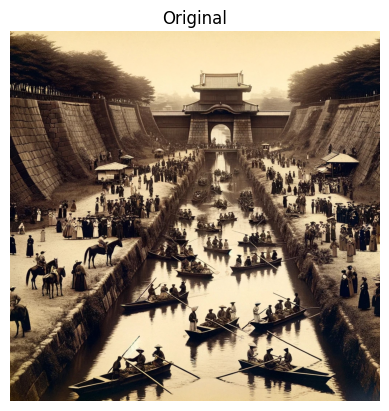

Box11img0018.tif


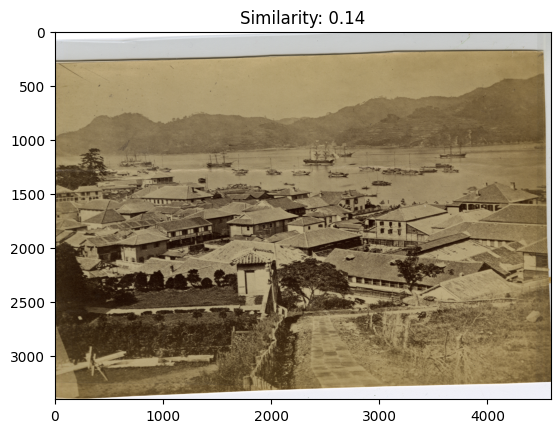

Box10img0024.tif


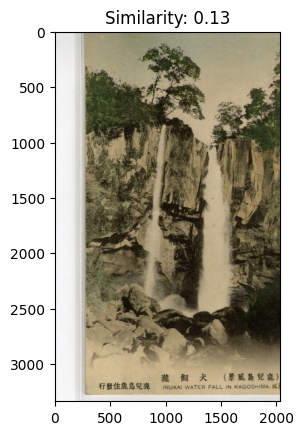

Box10img0042.tif


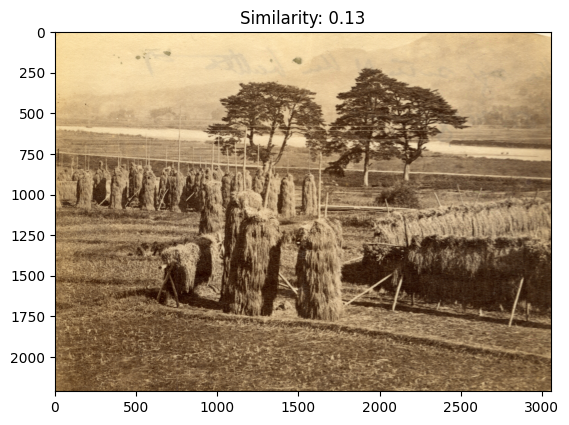

Box13img0013.tif


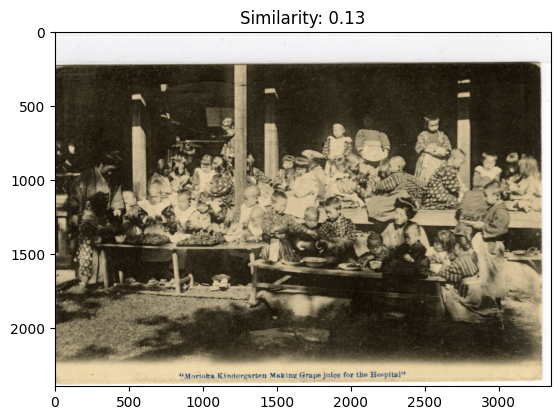

Box3img0037.tif


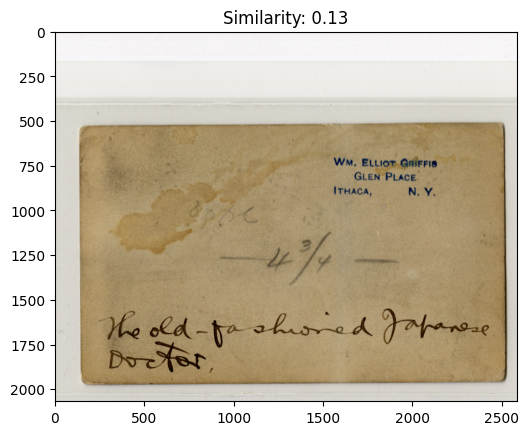

In [ ]:
# Display the original images and five most similar images, with similarity cosine
display_image(input_file, "Original")


top_n = 5  # Display top 5 similar images
for i, (img_name, sim) in enumerate(sorted_similarities[:top_n]):
    plt.figure()
    img_path = os.path.join(images_directory, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Similarity: {sim:.2f}")
    print(img_name)
    plt.show()